## setup and notebook configuration

In [1]:
import numpy as np

In [2]:
# matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as mtri               # delaunay triangulation
from mpl_toolkits.mplot3d import Axes3D     # surface plotting
import seaborn as sns
import cmocean as cmo
sns.set()
%matplotlib inline

/home/corbin/virtual_envs/FEMexperiment_env/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# local imports
import src.msh.mesh as MESH
import src.handlers.dof_handler as DOFH
import src.fem_base.master.master_2D as MASTER2D
import src.fem_base.master.master_1D as MASTER1D
import src.fem_maps.fem_map as FEM_MAP

# overview

# `Mesh2D`

This is the re-written MPU `Mesh2D` class.

In [5]:
tP = np.array(
      [[ 1. ,  2. ,  0. ],
       [ 1. ,  3. ,  0. ],
       [ 1.5,  2. ,  0. ],
       [ 1.6,  3.5,  0. ]])

tT = np.array(
      [[0, 2, 1, -1],
       [2, 3, 1, -1]])

In [6]:
tri_mesh = MESH.Mesh2D(tT, tP)

# `DOFHandler2D`

In [7]:
p=3
master_tri = MASTER2D.Master2DTriangle(p=p)
master_edge = MASTER1D.Master1D(p=p)

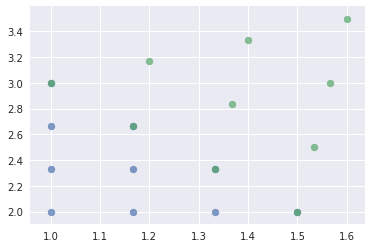

In [8]:
dofh = DOFH.HDG_dofh(n=p, mesh=tri_mesh, master_elms=[master_tri], master_eds=[master_edge])
for elm in range(dofh.n_elm):
    x, y = dofh.dgnodes[0][:,0,elm], dofh.dgnodes[0][:,1,elm]
    plt.scatter(x, y, alpha=0.7)

# Finite Element Mappings

In [9]:
# check _jacobian applied to dgnodes on the edge
_map = FEM_MAP.Isoparametric_Mapping([master_tri], dofh.dgnodes, map_nodes='NODAL')

In [10]:
Ds = master_edge.dshap_nodal
ed0 = dofh.dgnodes_ed[0][:,:,1]

In [11]:
dxdξ = np.dot(Ds, ed0)

In [12]:
dxdξ, dydξ = dxdξ[:,0], dxdξ[:,1]

In [13]:
I = np.sqrt(dxdξ**2 + dydξ**2)

In [14]:
nrm = 1/np.abs(I)[:,np.newaxis] * np.vstack((dydξ, -dxdξ)).T

In [15]:
nrm

array([[-1.00000000e+00, -6.66133815e-16],
       [-1.00000000e+00,  1.11022302e-16],
       [-1.00000000e+00,  2.22044605e-16],
       [-1.00000000e+00, -0.00000000e+00]])